In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
# Preprocess data
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [4]:
# Build model
model = keras.Sequential(
    [
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

In [5]:
# Compile model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [6]:
# Train model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 23s 5ms/step - loss: 0.2382 - accuracy: 0.9291 - val_loss: 0.0672 - val_accuracy: 0.9778
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1012 - accuracy: 0.9705 - val_loss: 0.0529 - val_accuracy: 0.9821
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0765 - accuracy: 0.9769 - val_loss: 0.0450 - val_accuracy: 0.9842
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0622 - accuracy: 0.9810 - val_loss: 0.0393 - val_accuracy: 0.9869
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0490 - accuracy: 0.9844 - val_loss: 0.0440 - val_accuracy: 0.9856
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0434 - accuracy: 0.9862 - val_loss: 0.0397 - val_accuracy: 0.9874
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0391 - accuracy: 0.9870 - val_loss: 0.0380 - val_accuracy

In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.0429 - accuracy: 0.9884 - 723ms/epoch - 2ms/step


In [7]:
# Plot accuracy
import matplotlib.pyplot as plt

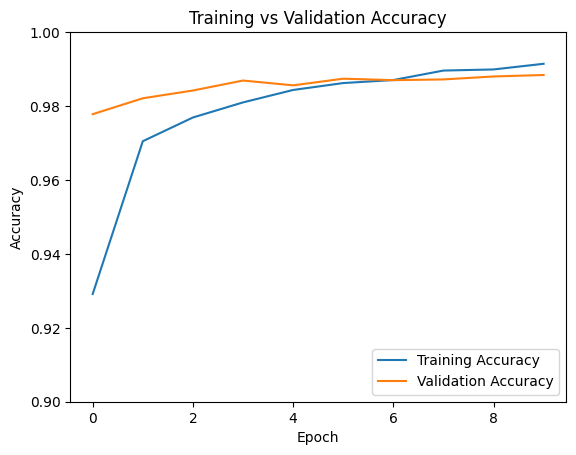

In [8]:
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.ylim([0.9, 1])
plt.legend(loc="lower right")
plt.show()

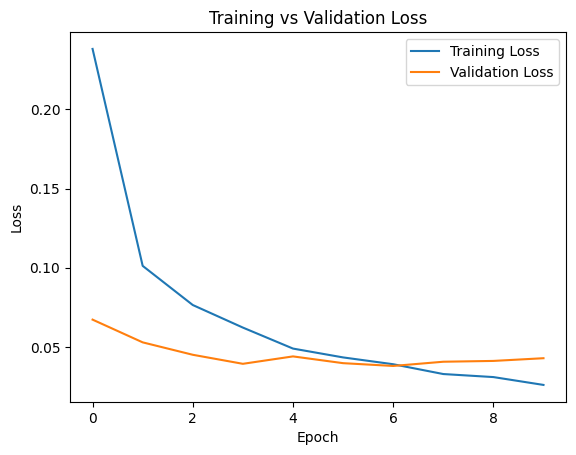

In [9]:
# Plot loss
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend(loc="upper right")
plt.show()

In [10]:
# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy:", test_acc)

313/313 - 1s - loss: 0.0429 - accuracy: 0.9884 - 690ms/epoch - 2ms/step
Test accuracy: 0.9883999824523926
